In [8]:
import pandas as pd


df = pd.read_csv('lung-cancer-dataset.csv')

df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


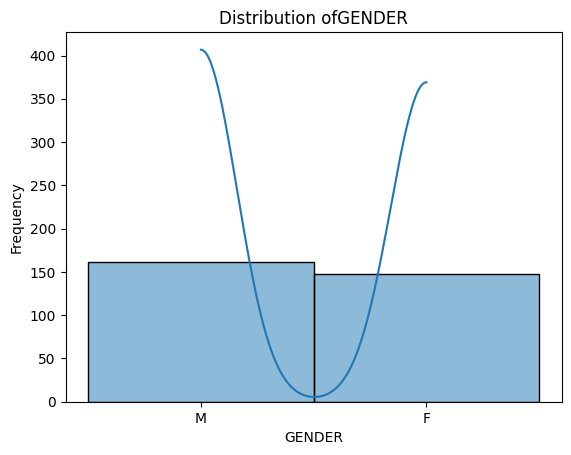

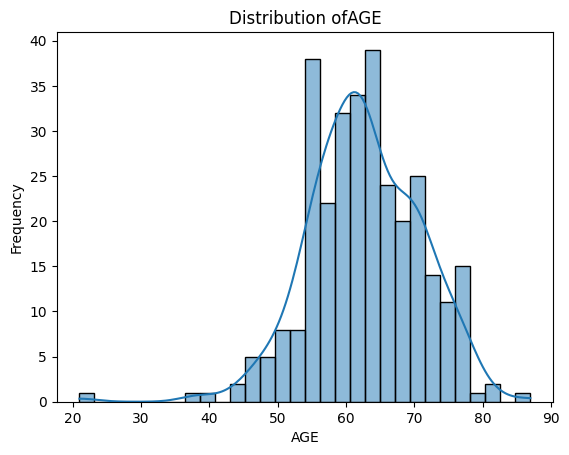

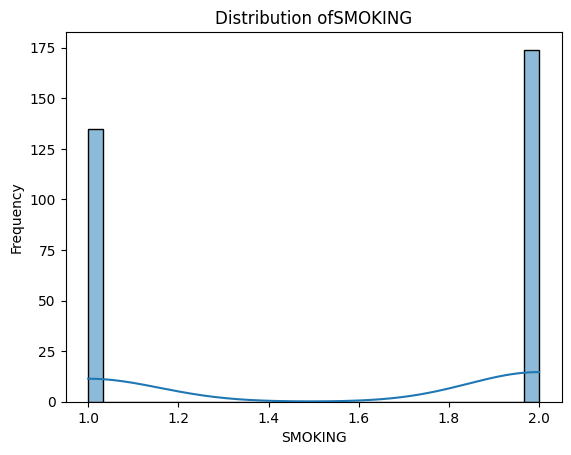

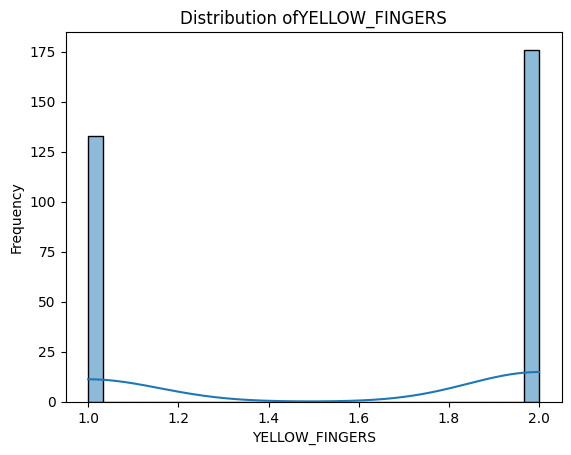

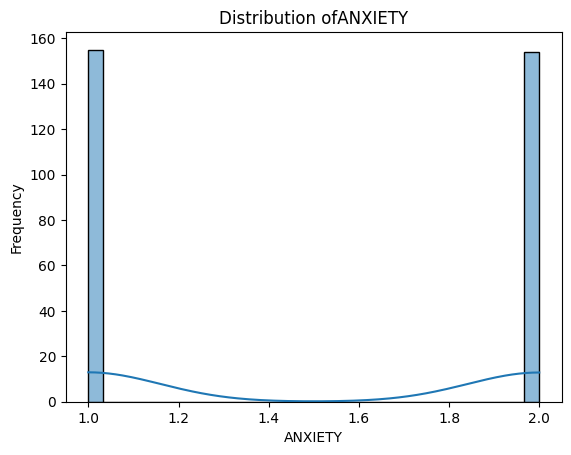

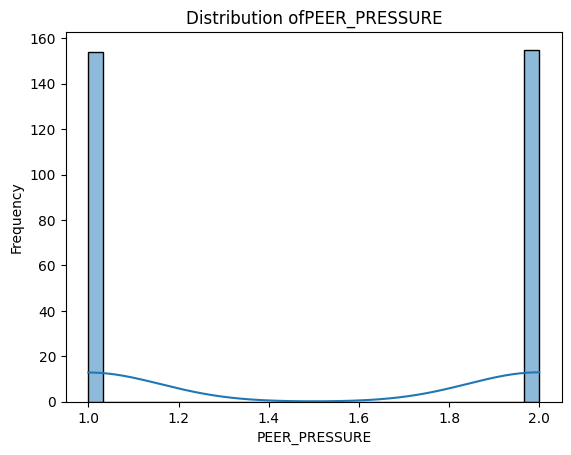

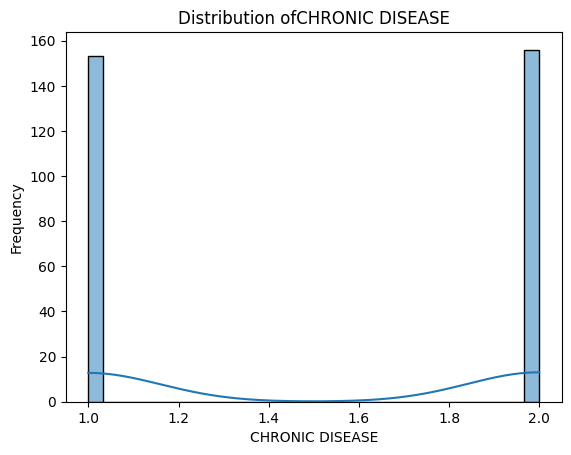

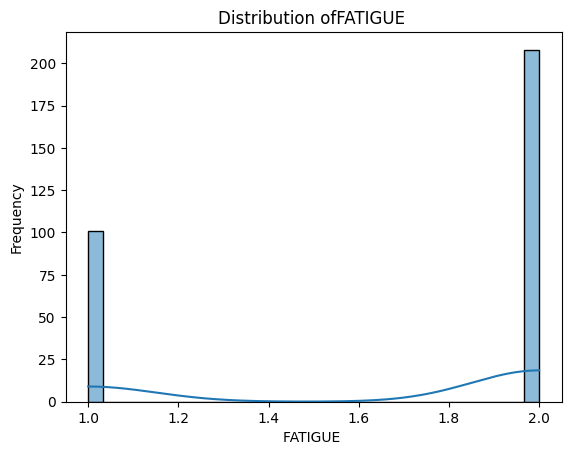

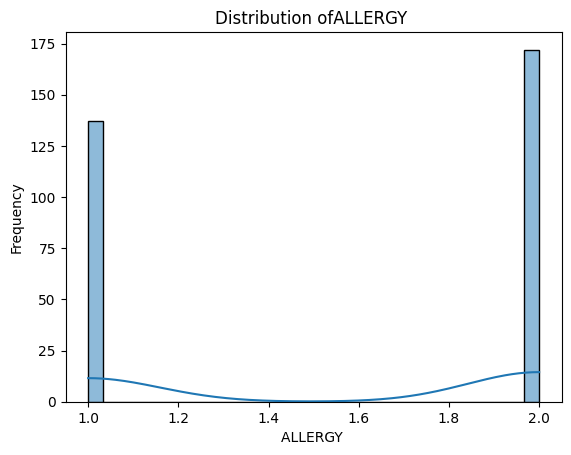

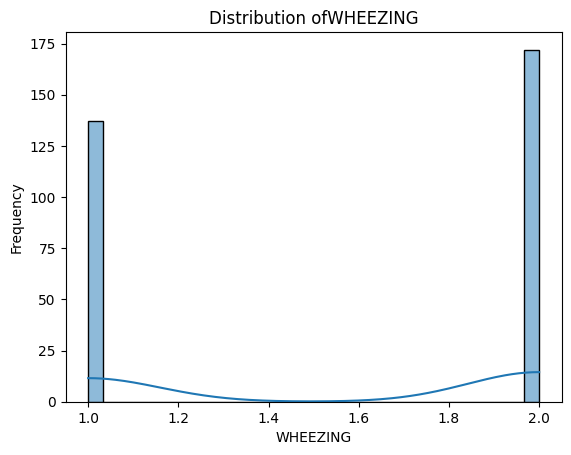

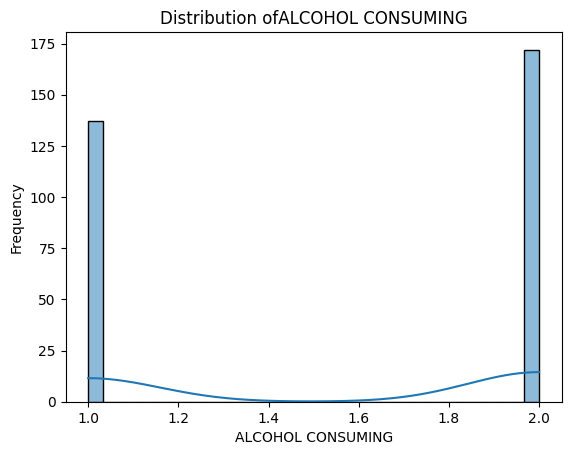

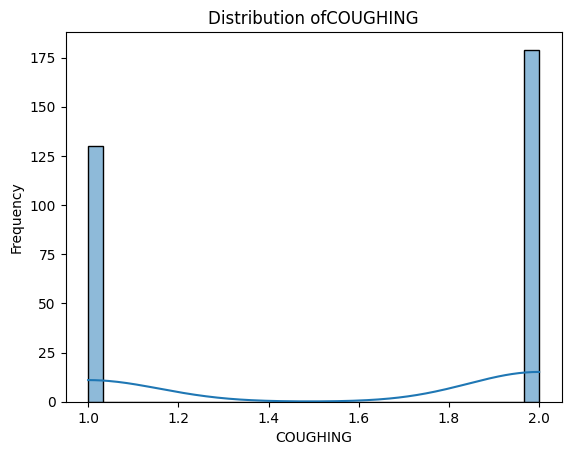

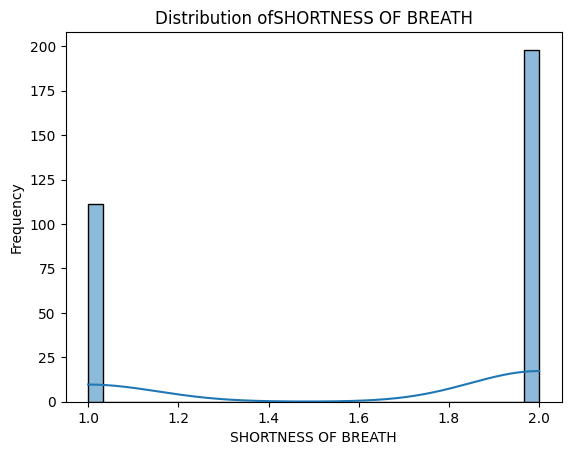

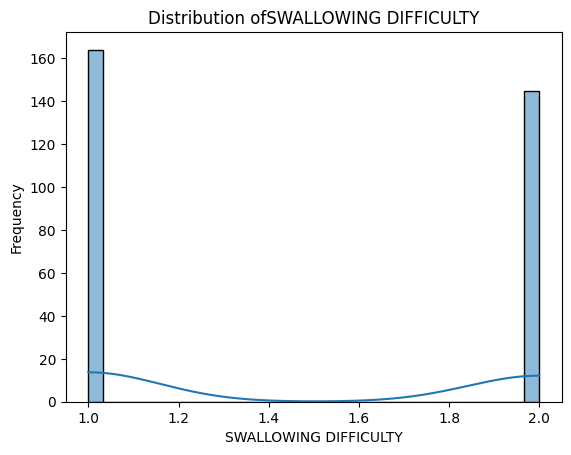

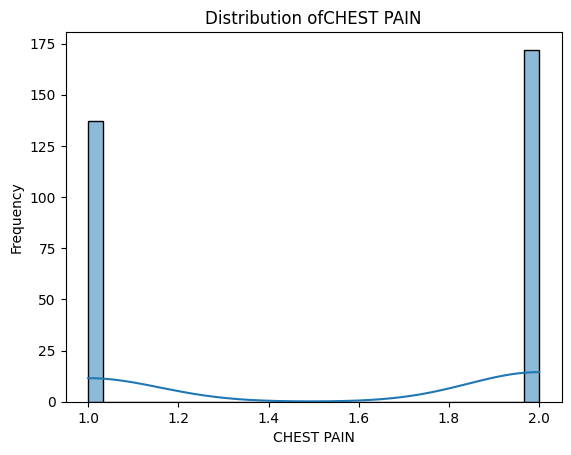

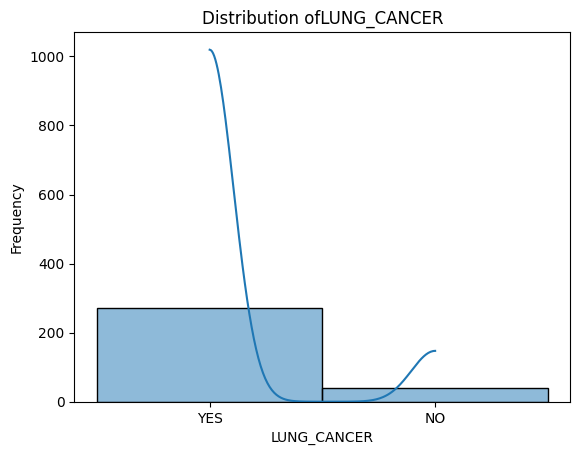

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
  sns.histplot(df[column], bins=30, kde=True)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distribution of' + column)
  plt.show()


In [10]:
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

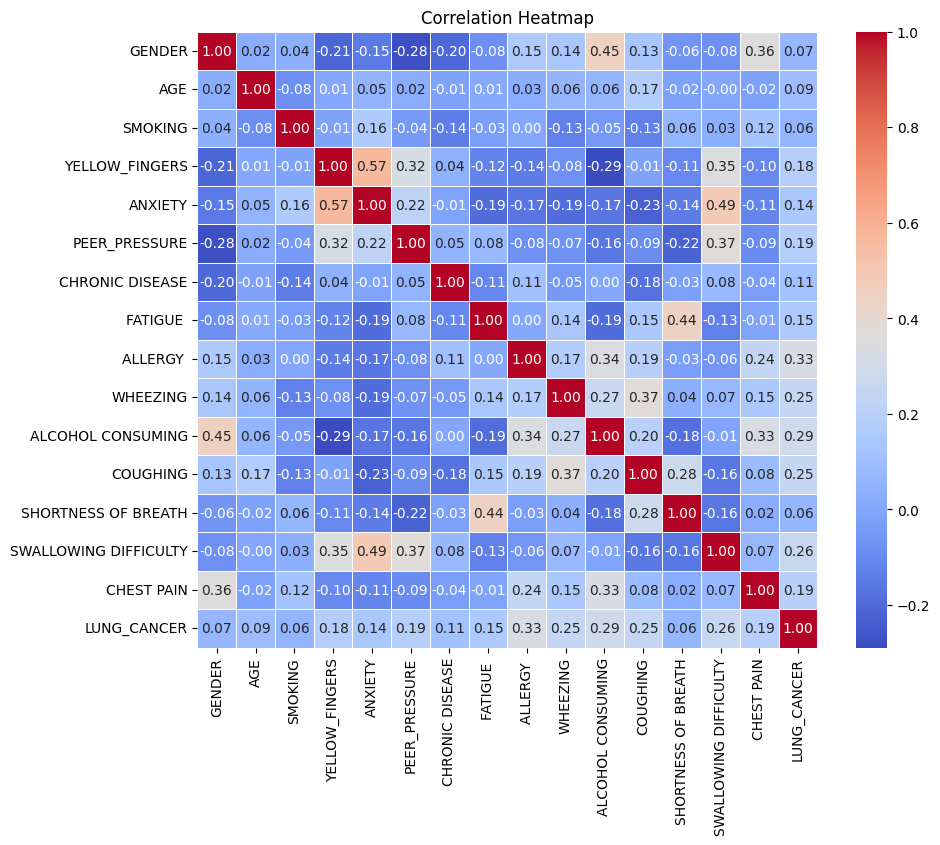

In [11]:
correlation= df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

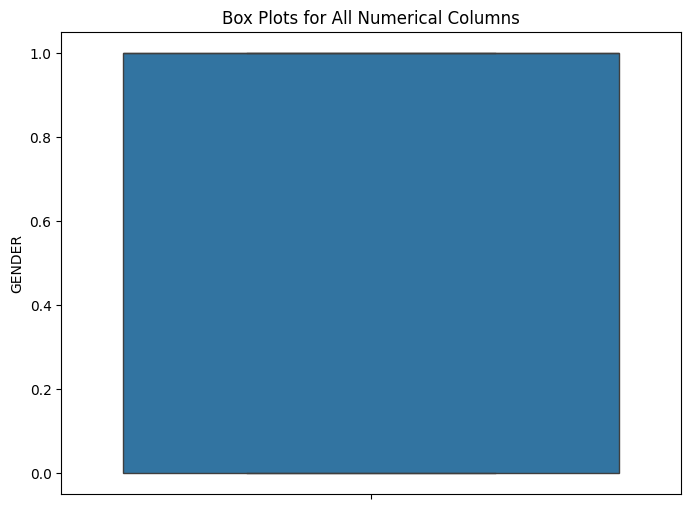

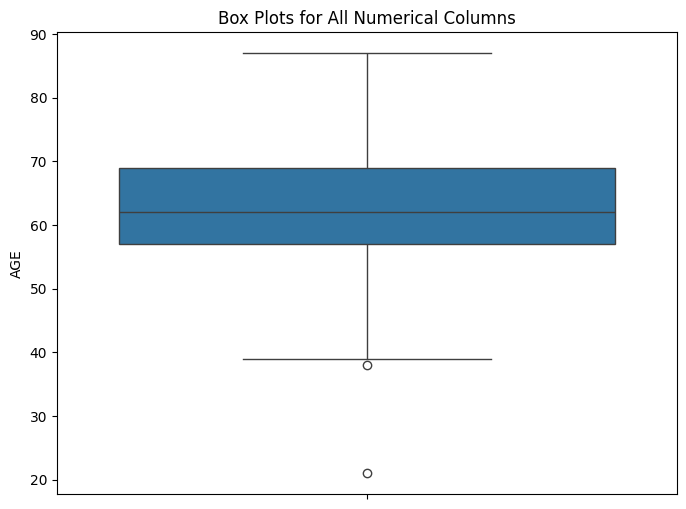

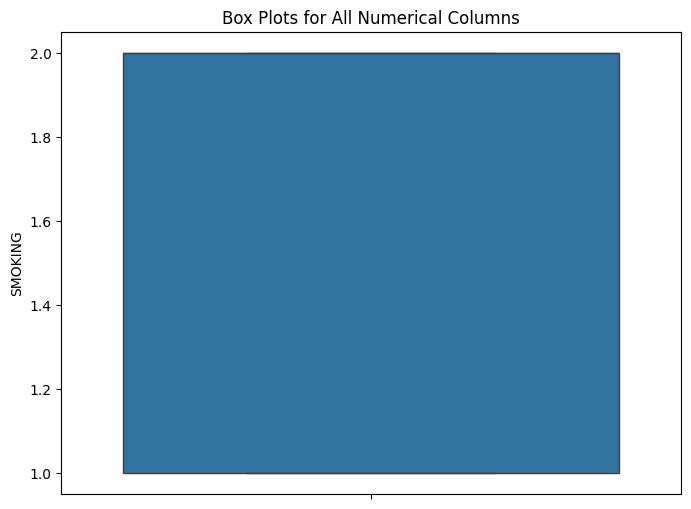

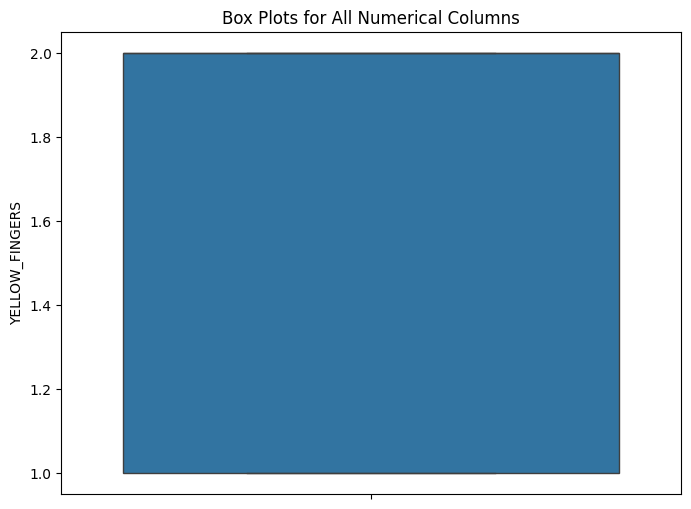

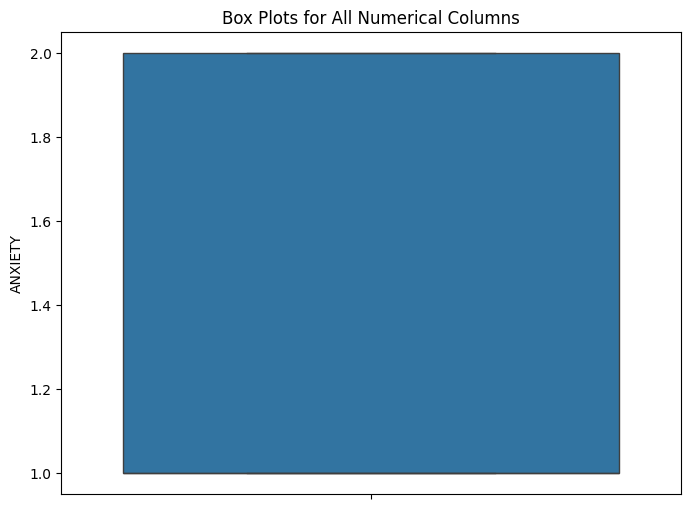

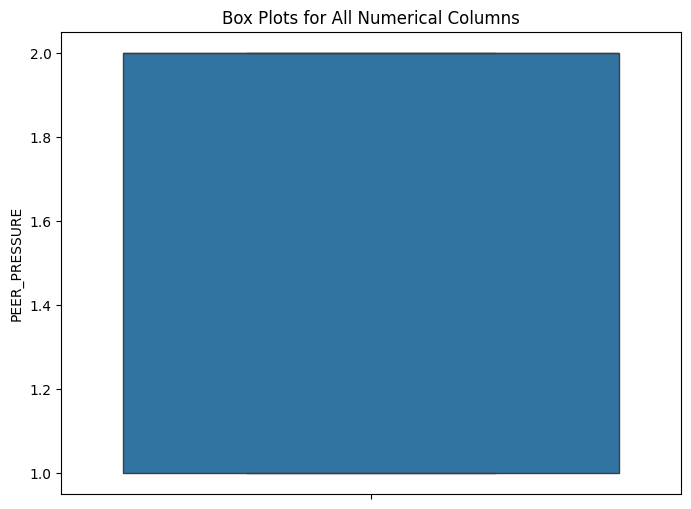

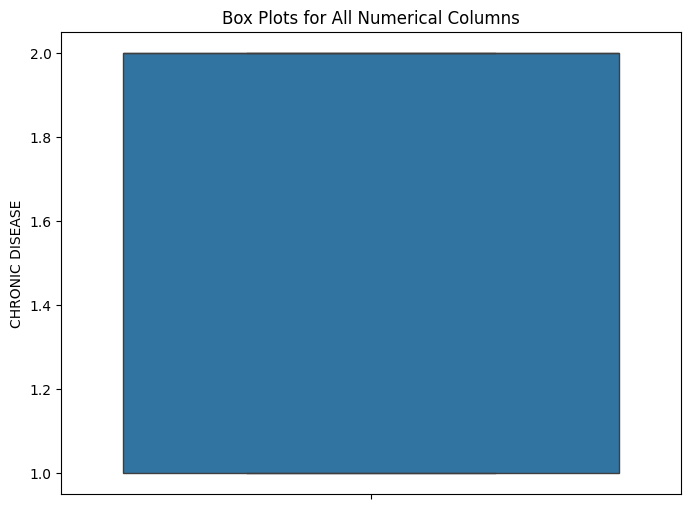

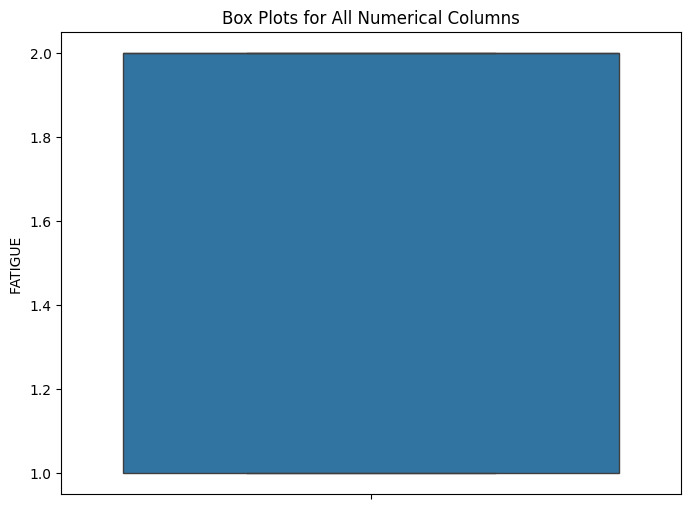

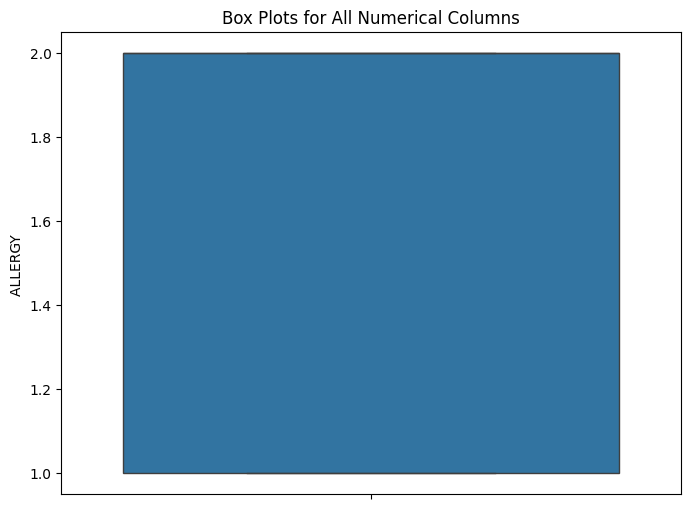

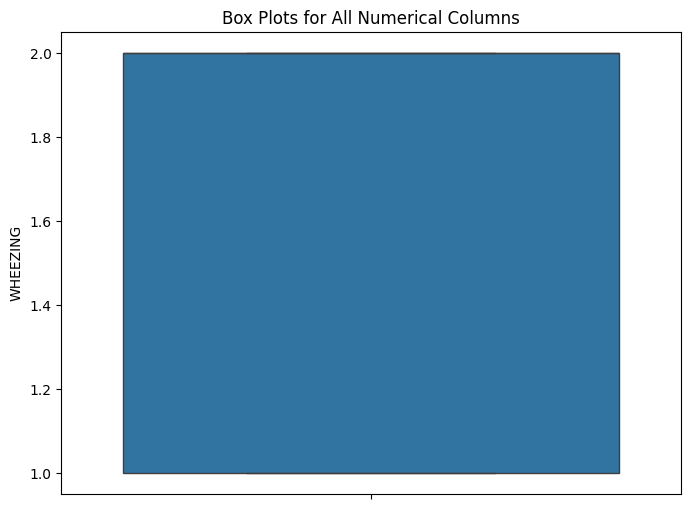

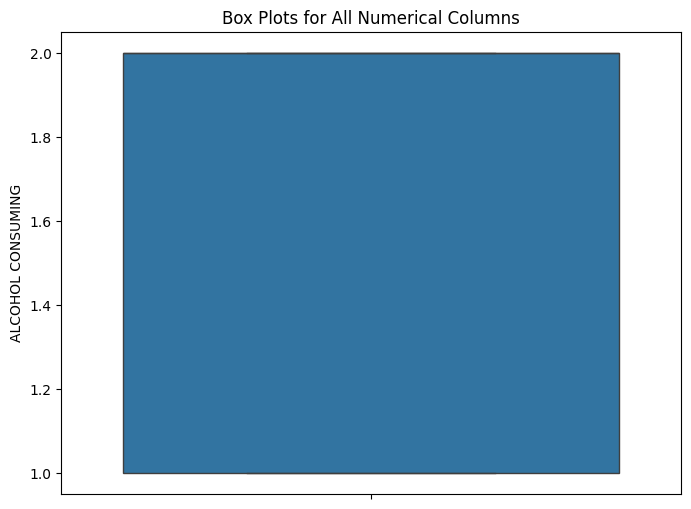

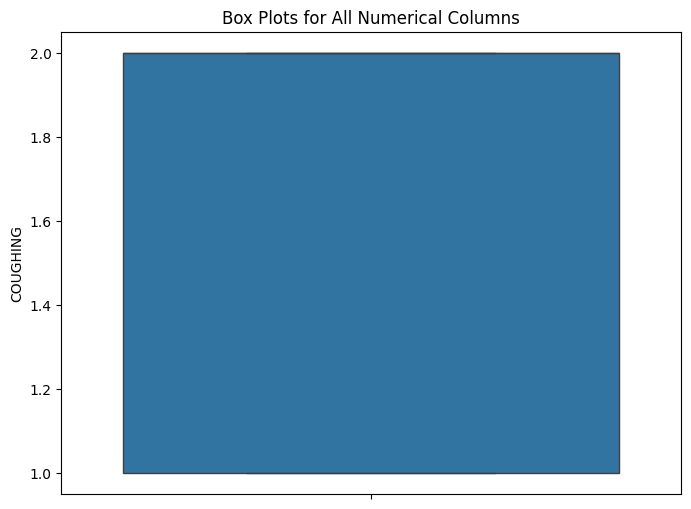

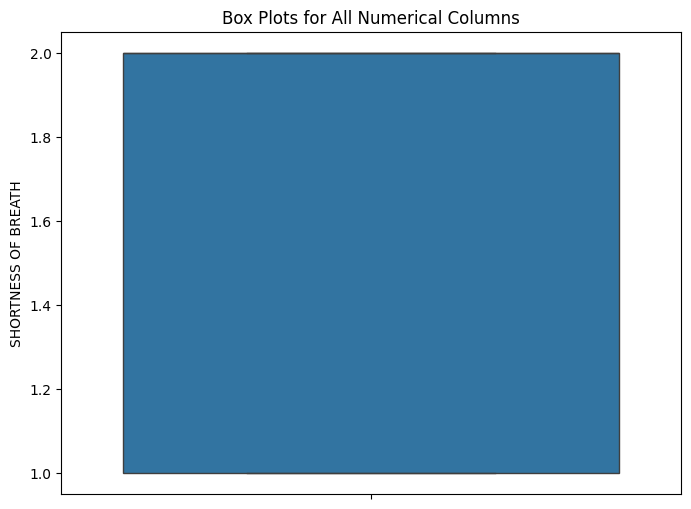

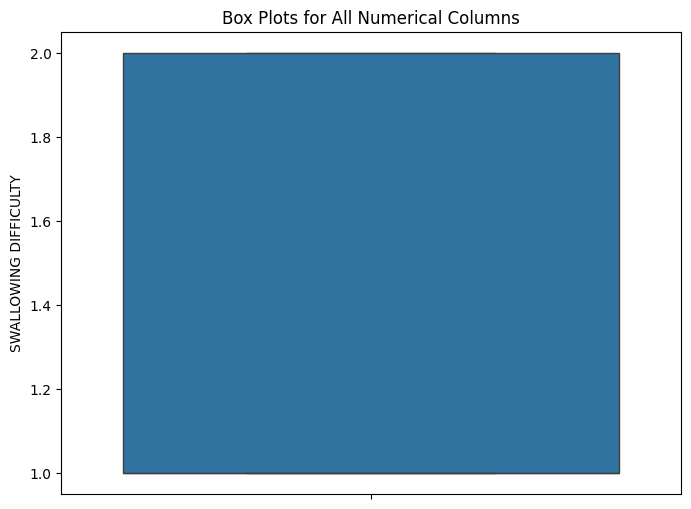

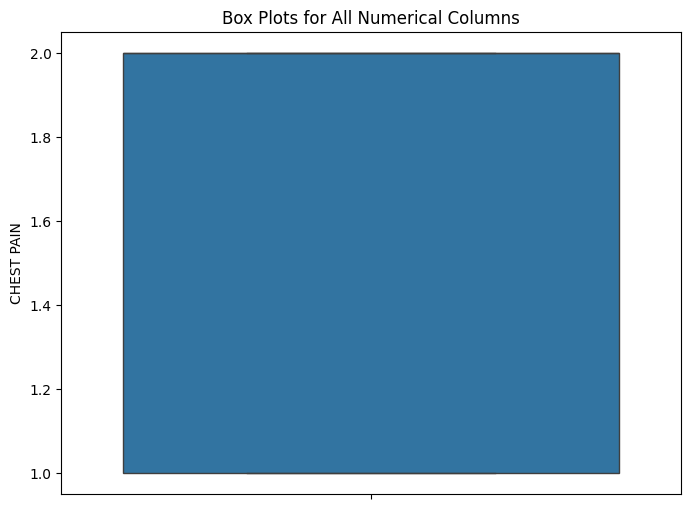

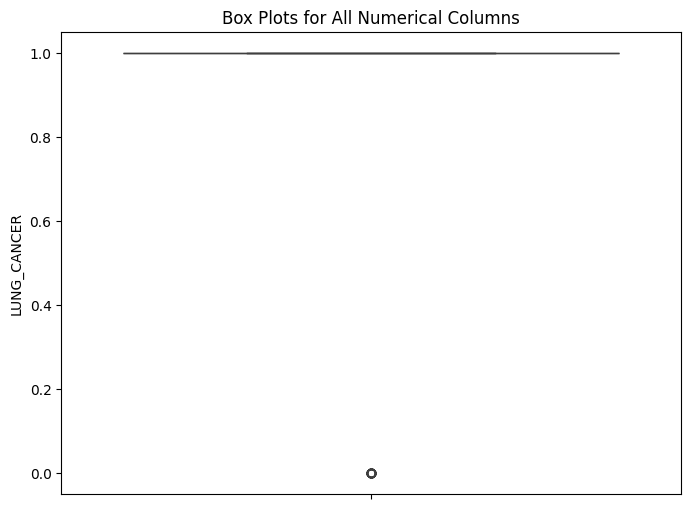

In [12]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])
  plt.title('Box Plots for All Numerical Columns')
  plt.xticks(rotation=90)
  plt.show()

# definindo o melhor valor de K para kmeans

In [38]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [76]:

df_km = df[sorted(df.columns)]

df_km = df_km.drop('LUNG_CANCER', axis=1)


In [78]:
wcss = []
sil = []
cb = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i ,random_state=42)
    kmeans.fit(df_km)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(df_km, labels, metric = 'euclidean')) if i!=1 else sil.append(0)
                                                                                              
    cb.append(calinski_harabasz_score(df_km, labels))  if i!=1 else cb.append(0)

In [79]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0, 1))

wcss = scaler.fit_transform( np.array(wcss).reshape(-1,1))
cb = scaler.fit_transform(np.array(cb).reshape(-1,1))
sil = scaler.fit_transform(np.array(sil).reshape(-1,1))

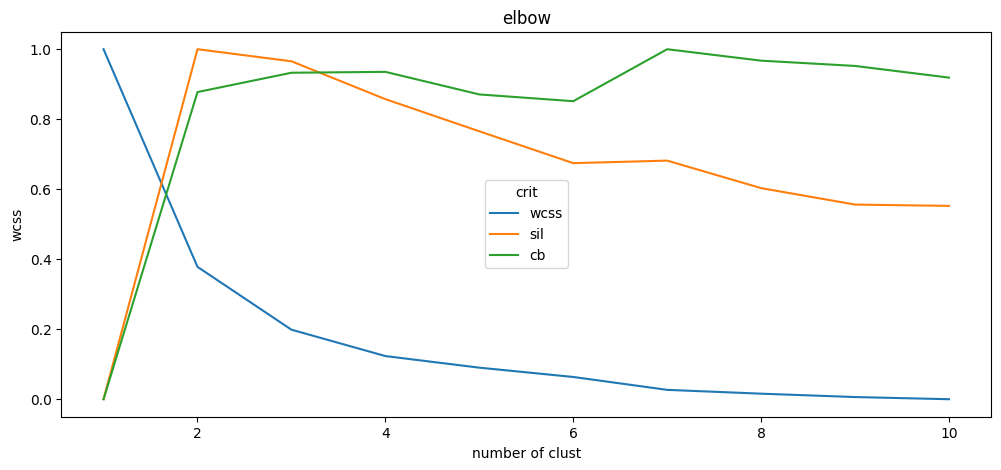

In [80]:

plt.figure(figsize=(12,5))
plt.plot(range(1,11), wcss, label="wcss")
plt.plot(range(1,11), sil, label="sil")
plt.plot(range(1,11), cb , label="cb")
plt.legend(title = "crit") 
plt.title('elbow')
plt.xlabel('number of clust')
plt.ylabel('wcss')
plt.show()

wcss pode ser 3 ou 4. Baseado no metodo da silhoeta que mede o qual proximos são os pontos intra cluster e calinski harabaz que mede o qual coesos entre si são os pontos em comparação com o quão  não coesos interclusteres são.

In [81]:
lung_cancer_kmeans = KMeans(n_clusters= 3 ,random_state=42)
lung_cancer_kmeans.fit(df_km)

KMeans(n_clusters=3, random_state=42)

## o cluster e correlação com diagnostico

In [82]:
df_km['cluster'] = lung_cancer_kmeans.predict(df_km)
df_km['LUNG_CANCER'] = df['LUNG_CANCER']


In [83]:
# Check if indices are the same
if df.index.equals(df_km.index):
    df_km['LUNG_CANCER'] = df['LUNG_CANCER']
else:
    print("The DataFrames are not aligned!")


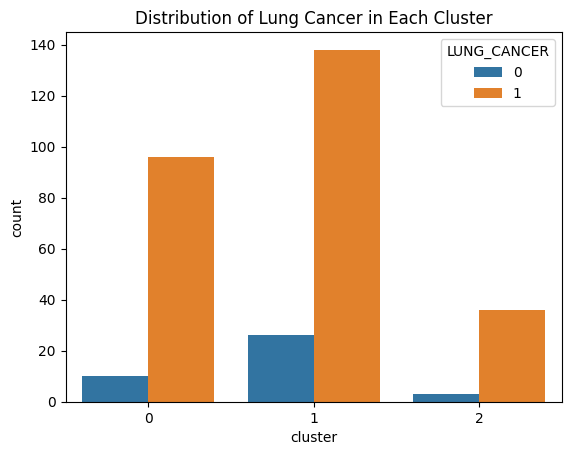

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='cluster', hue='LUNG_CANCER', data=df_km)
plt.title('Distribution of Lung Cancer in Each Cluster')
plt.show()
